<a href="https://colab.research.google.com/github/yuukun123/Python/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Tùy chỉnh để hiển thị biểu đồ đẹp hơn
sns.set(style="whitegrid")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/Final_Cleaned_Database.xlsx")
print(df.to_string())

     Expression           Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating  ConfusionRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp  ConfusionComp  Anger  Disgust  Fear       Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  EpicanthicFold  EyeSquintLeft  EyeSquintRight   aah  B,M,P  big aah  ch,J,sh  D,S,T       F,V         K     N        oh  brow lowerer left  brow lowerer right   blink left  blink right  expression anger  expression baring teeth   expression disgust  expression fear  expression sad  expression smile right  expression smileclosed  expression smileopen  expression sneer  expression sneer left  expression surprise  modifier epicanthic fold  modifier eyesquint left  modifier eyesquint right  phoneme B,M,P  phoneme D,S,T  phoneme F,V  phoneme K  phoneme N  phoneme aah  phoneme big aah  phoneme 

In [ ]:
# Đường dẫn file
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx"
xls = pd.ExcelFile(file_path)

hàm lọc dữ liệu sheet ExpressionAverage


In [ ]:
# def clean_expression_sheet(df, required_cols=["Expression"]):
#     # Xóa cột không tên
#     df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

#     # Xóa dòng thiếu cột bắt buộc
#     df = df.dropna(subset=required_cols)

#     # Loại bỏ các biểu cảm không dùng
#     df = df[~df["Expression"].str.lower().str.contains("pms13")]
#     df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

#     # Các cột cần ép kiểu và xử lý NaN
#     numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
#     for col in numeric_cols:
#         if col in df.columns:
#             df[col] = df[col].replace([".", ""], np.nan)
#             df[col] = pd.to_numeric(df[col], errors="coerce")
#             df[col] = df[col].fillna(df[col].mean())

#     # Loại bỏ các dòng liên quan face gen pro
#     df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

#     df = df.infer_objects(copy=False)

#     return df


In [ ]:
def clean_expression_sheet(df, required_cols=["Expression"]):
  # Xóa cột không tên
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # Xóa dòng thiếu cột bắt buộc
  df = df.dropna(subset=required_cols)

  # Loại bỏ các biểu cảm không dùng
  df = df[~df["Expression"].str.lower().str.contains("pms13")]
  df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

  # ✅ Loại bỏ các dòng liên quan face gen pro TRƯỚC để không ảnh hưởng đến mean
  df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

  # Các cột cần ép kiểu và xử lý NaN
  numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
  for col in numeric_cols:
      if col in df.columns:
          df[col] = df[col].replace([".", ""], np.nan)
          df[col] = pd.to_numeric(df[col], errors="coerce")
          df[col] = df[col].fillna(df[col].mean())

  df = df.loc[:, ~df.columns.str.contains("ConfusionRating")]
  df = df.loc[:, ~df.columns.str.contains("ConfusionComp")]

  df = df.infer_objects(copy=False)
  return df


ExpressionAverages

In [ ]:
df_expr = pd.read_excel(xls, sheet_name="ExpressionAverages")
# print(df_expr.dtypes)
df_expr = clean_expression_sheet(df_expr)

print(df_expr.to_string())

   Expression Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp
0         AJ2      FirstPass    5.052632    2.894737     2.078947       2.421053         1.210526       3.131579        2.131579      1.736842  2.033766e-06  9.570970e-08  3.064130e-07   1.954638e-12  1.372440e-04  6.551333e-07  3.610371e-09
3         AK5      FirstPass    4.650000    2.225000     2.725000       2.575000         1.275000       2.275000        1.725000      2.375000  7.102722e-09  4.114614e-05  2.849266e-06   6.427339e-13  3.038153e-08  1.352565e-10  1.223136e-07
6         EF5      FirstPass    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06
9         KM4      FirstPass    

<ipython-input-6-63b2d55437d4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


hàm lọc dữ liệu sheet slider_face_gen

In [ ]:
def clean_slider_facegen_sheet(df):

  # Xóa các cột không tên (thường là chú thích hoặc rỗng)
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # Loại bỏ cột 'PMS13' nếu có (theo khuyến nghị)
  if "PMS13" in df.columns:
      df = df.drop(columns=["PMS13"])

  # Duyệt qua tất cả các cột trừ 'Slider'
  numeric_cols = df.columns.drop("Slider")
  for col in numeric_cols:
      # Thay "." và chuỗi rỗng thành NaN
      df[col] = df[col].replace([".", ""], np.nan)

      # Ép kiểu thành số (sai sẽ thành NaN)
      df[col] = pd.to_numeric(df[col], errors="coerce")

      # Điền thiếu bằng trung bình cột
      df[col] = df[col].fillna(df[col].mean())

  # Bỏ cảnh báo downcasting
  df = df.infer_objects(copy=False)

  return df


Slider_face_gen

In [ ]:
df_slider_mo = pd.read_excel(xls, sheet_name="Sliders_FaceGenModeller")
# print(df_slider_mo.dtypes)
df_slider_mo = clean_slider_facegen_sheet(df_slider_mo)
print(df_slider_mo.to_string())

            Slider       AK5    AJ2     EF5      KM4   KM4b      PMS5      PMS7    PMS14      PMS2  PMS8
0            Anger  0.220000  0.438  0.8400  0.87375  0.849  0.950000  0.070000  0.75000  0.350000  0.15
1          Disgust  0.480000  0.210  0.8700  0.77000  0.770  0.595714  1.000000  0.39000  0.750000  1.00
2             Fear  0.551818  1.000  0.5125  0.87375  0.849  0.595714  0.811111  0.69125  0.530909  0.47
3              Sad  0.830000  1.000  1.0000  1.00000  1.000  1.000000  1.000000  1.00000  1.000000  1.00
4      SmileClosed  0.551818  0.438  0.4600  1.00000  1.000  0.700000  1.000000  0.69125  1.000000  1.00
5        SmileOpen  0.551818  0.800  0.1300  0.87375  0.500  0.140000  0.230000  0.13000  0.530909  0.47
6         Surprise  0.551818  0.438  0.5125  0.87375  0.849  0.595714  0.811111  0.69125  0.400000  0.20
7        BlinkLeft  0.560000  0.150  0.5125  0.87375  0.849  0.200000  0.811111  0.69125  0.300000  0.13
8       BlinkRIght  0.570000  0.140  0.5125  0.87375  0

<ipython-input-8-57b868a77ba0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


hàm lọc first_pass_norming

In [ ]:
# def clean_first_pass_norming(df):
#     import pandas as pd


#     # 1. Loại cột chứa 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Loại bỏ các cột nhân khẩu học không cần thiết
#     drop_cols = ['Race', 'SexualOrient', 'Political']
#     df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#     # 3. Tìm các cột đánh giá cảm xúc
#     rating_cols = [c for c in df.columns if "emotion" in c.lower()]

#     # 4. Tính tỷ lệ thiếu
#     miss_ratios = df[rating_cols].isna().mean()

#     # 5. Giữ lại các cột có missing <= 0.4
#     keep_cols = miss_ratios[miss_ratios <= 0.4].index.tolist()
#     df = df[keep_cols + [col for col in df.columns if col not in rating_cols]]

#     # 6. Phân loại cột theo mức độ thiếu
#     small_missing = miss_ratios[miss_ratios < 0.05].index.tolist()
#     large_missing = miss_ratios[(miss_ratios >= 0.05) & (miss_ratios <= 0.4)].index.tolist()

#     # 7. Drop dòng chứa missing < 5%
#     df = df.dropna(subset=small_missing)

#     # 8. Điền missing >= 5% bằng mode
#     for col in large_missing:
#         mode_val = df[col].mode().iat[0]
#         df[col] = df[col].fillna(mode_val).astype(int)

#     # 9. Reshape wide → long format
#     id_vars = ['ResponseId', 'Age', 'Gender']
#     id_vars = [col for col in id_vars if col in df.columns]

#     long_df = df.melt(
#         id_vars=id_vars,
#         value_vars=keep_cols,
#         var_name="Item",
#         value_name="Rating"
#     )

#     # 10. Tách thông tin từ tên cột: ImageID, EmotionType, QuestionNumber
#     long_df[['ImageID', 'EmotionType', 'QuestionNum']] = long_df['Item'].str.extract(r'([A-Za-z0-9_]+)_([a-zA-Z0-9]+)_([0-9]+)')

#     # 11. Xử lý kiểu dữ liệu
#     long_df['Rating'] = pd.to_numeric(long_df['Rating'], errors='coerce')
#     long_df['QuestionNum'] = pd.to_numeric(long_df['QuestionNum'], errors='coerce')

#     return long_df


In [ ]:
# def clean_first_pass_norming(df):
#     # 1. Loại bỏ các cột chứa 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Bỏ dòng đầu tiên (header mô tả)
#     df = df.drop(index=0).reset_index(drop=True)

#     # 3. Tìm các cột cảm xúc
#     emotion_cols = [col for col in df.columns if "_emotion_" in col]

#     # 4. Chuẩn bị metadata: Age, Gender
#     df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

#     df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
#     df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

#     # ✅ Chuẩn hóa Gender: female = 0, male = 1
#     gender_map = {'female': 0, 'male': 1}
#     df_meta['Gender'] = df_meta['Gender'].map(gender_map)

#     # ✅ Xóa các dòng Gender không hợp lệ (NaN)
#     df_meta = df_meta.dropna(subset=['Gender'])

#     # 5. Chuyển về dạng long format
#     df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
#                       var_name='Image_ID', value_name='Emotion')

#     # 6. Bỏ các dòng không có nhãn
#     df_long.dropna(subset=['Emotion'], inplace=True)

#     # 7. Trích tên file ảnh từ tên cột
#     df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
#     df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

#     # ✅ 7.5. Lọc các ảnh có ExpressionKey hợp lệ
#     valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
#     df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

#     # 8. Đổi kiểu nhãn cảm xúc sang số
#     df_long['Emotion'] = df_long['Emotion'].astype(int)

#     # 9. Merge thêm Age và Gender
#     df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

#     return df_long


In [ ]:
def clean_first_pass_norming(df):
    # 1. Loại bỏ các cột chứa 'pms13'
    df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

    # 2. Bỏ dòng đầu tiên (header mô tả)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. Tìm các cột cảm xúc
    emotion_cols = [col for col in df.columns if "_emotion_" in col]

    # 4. Chuẩn bị metadata: Age, Gender
    df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

    df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
    df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

    # ✅ Chuẩn hóa Gender: female = 0, male = 1
    gender_map = {'female': 0, 'male': 1}
    df_meta['Gender'] = df_meta['Gender'].map(gender_map)

    # ✅ Xóa các dòng Gender không hợp lệ (NaN)
    df_meta = df_meta.dropna(subset=['Gender'])

    # 5. Chuyển về dạng long format
    df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
                      var_name='Image_ID', value_name='Emotion')

    # 6. Bỏ các dòng không có nhãn
    df_long.dropna(subset=['Emotion'], inplace=True)

    # 7. Trích tên file ảnh từ tên cột
    # Ví dụ tên ảnh: AF1_AJ2.jpg
    # df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'_[A-Z]*([A-Za-z0-9]+)_emotion_\d+')[0]

    df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
    df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

    # ✅ 7.5. Lọc các ảnh có ExpressionKey hợp lệ
    valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
    df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

    # 8. Đổi kiểu nhãn cảm xúc sang số
    df_long['Emotion'] = df_long['Emotion'].astype(int)

    # 9. Merge thêm Age và Gender
    df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

    return df_long


Fist_pass_norming

In [ ]:
df_first = pd.read_excel(xls, sheet_name="FirstPassNorming")
df_first = clean_first_pass_norming(df_first)


print(df_first.to_string())
# df_first.info()
# df_first.head()


             ResponseId          Image_ID  Emotion ExpressionKey  ImageFile  Age  Gender
0     R_2zw5psM5CtFQKno    EF5_emotion_18        4           EF5    EF5.jpg   26     1.0
1     R_2Ua2Dc353v4cNGn    EF5_emotion_18        2           EF5    EF5.jpg   32     0.0
2     R_2YR34dGGiKYFi2y    EF5_emotion_18        7           EF5    EF5.jpg   64     0.0
3     R_BWYpKelNH9C8aRj    EF5_emotion_18        1           EF5    EF5.jpg   24     1.0
4     R_2an0MfrT5MWzwiQ    EF5_emotion_18        7           EF5    EF5.jpg   45     0.0
5     R_3PGE13wEeq6tIOT    EF5_emotion_18        1           EF5    EF5.jpg   21     1.0
6     R_1lzUZmKRQVzOpxD    EF5_emotion_18        6           EF5    EF5.jpg   39     1.0
7     R_31uzrii0srEgLi3    EF5_emotion_18        1           EF5    EF5.jpg   59     0.0
8     R_27U5GunQGBeN6FX    EF5_emotion_18        1           EF5    EF5.jpg   31     0.0
9     R_3oYotaD13IZxRGi    EF5_emotion_18        1           EF5    EF5.jpg   25     1.0
10    R_2B4ImrFXFEt8L

hàm lọc demographics

In [ ]:
def clean_demographics(df):
    # 0. Giữ lại hai cột đầu tiên (giả sử là cột chứa Age và Gender)
    df = df.iloc[:, :2]

    # 1. Đặt tên cột
    df.columns = ['Age', 'Gender']  # Đặt tên cột là "Age" và "Gender"

    # 2. Xóa dòng đầu tiên (Age, Gender)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. Chuẩn hóa cột Gender: Female -> 0, Male -> 1, các giá trị khác -> NaN
    df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
    gender_map = {'female': 0, 'male': 1}
    df['Gender'] = df['Gender'].map(gender_map).where(df['Gender'].isin(['female', 'male']), np.nan)

    return df

Demographics

In [ ]:
df_demographics = pd.read_excel(xls, sheet_name="Demographics")
df_demographics = clean_demographics(df_demographics)
print(df_demographics.to_string())


   Age  Gender
0   25       0
1   26       1
2   49       0
3   32       0
4   64       0
5   36       0
6   49       1
7   32       0
8   25       1
9   24       1
10  45       0
11  32       0
12  21       1
13  39       1
14  59       0
15  31       0
16  39       1
17  31       1
18  39       1
19  48       0
20  25       1
21  40       0
22  24       1
23  40       0
24  27       1
25  36       1
26  26       0
27  35       1
28  36       1
29  26       1
30  37       1
31  61       1
32  48       1
33  31       0
34  36       0
35  33       0
36  21       0
37  46       1
38  46       1
39  40       1
40  28       0
41  44       1
42  51       0
43  45       0
44  49       0
45  31       1
46  36       1
47  20       0
48  43       1
49  23       1
50  44       0
51  43       0
52  52       0
53  34       1
54  75       1
55  40       0
56  39       0
57  40       0
58  61       0
59  27       0
60  49       1
61  40       0
62  29       0
63  29       1
64  25       1
65  35    

In [ ]:
# Giả sử 4 DataFrame đã tồn tại: df_expr, df_slider_mo, df_first, df_demographics

# Ghi vào file Excel với 4 sheet
with pd.ExcelWriter('/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx') as writer:
    df_expr.to_excel(writer, sheet_name='Expression', index=False)
    df_slider_mo.to_excel(writer, sheet_name='Slider_MO', index=False)
    df_first.to_excel(writer, sheet_name='First', index=False)
    df_demographics.to_excel(writer, sheet_name='Demographics', index=False)

print("save successful")


save successful


In [ ]:
# # Đường dẫn thư mục lưu file CSV
# output_dir = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/'

# # Lưu từng DataFrame vào file CSV riêng
# df_expr.to_csv(output_dir + 'Expression.csv', index=False)
# df_slider_mo.to_csv(output_dir + 'Slider_MO.csv', index=False)
# df_first.to_csv(output_dir + 'First.csv', index=False)
# df_demographics.to_csv(output_dir + 'Demographics.csv', index=False)

In [ ]:
# # Đường dẫn tới file Excel nhiều sheet
# xlsx_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"  # hoặc đường dẫn đầy đủ nếu cần

# # Đọc tất cả các sheet vào dict
# all_sheets = pd.read_excel(xlsx_path, sheet_name=None)

# # Gộp tất cả sheet lại thành một DataFrame
# merged_df = pd.concat(all_sheets.values(), ignore_index=True)

# # Lưu ra Excel
# merged_df.to_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.xlsx", index=False)

# # Lưu ra CSV
# merged_df.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.csv", index=False)

In [ ]:
# import pandas as pd

# # Đọc file Excel
# file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
# xls = pd.ExcelFile(file_path)

# # Đọc các sheet
# df_expression = xls.parse("Expression")
# df_slider = xls.parse("Slider_MO")
# df_first = xls.parse("First")
# df_demo = xls.parse("Demographics")

# # --- Bước 1: Transpose Slider_MO để phù hợp với Expression ---
# df_slider_t = df_slider.set_index('Slider').T.reset_index()
# df_slider_t = df_slider_t.rename(columns={'index': 'Expression'})

# # Merge với Expression theo cột "Expression"
# df_merged_exp = pd.merge(df_expression, df_slider_t, on="Expression", how="left")

# # --- Bước 2: Gộp Demographics vào First (giả định thứ tự dòng giống nhau) ---
# df_first_demo = pd.concat([df_first.reset_index(drop=True), df_demo.reset_index(drop=True)], axis=1)

# # --- Bước 3: Chuẩn hóa mã ảnh từ ImageFile để merge ---
# df_first_demo['ImageCode'] = df_first_demo['ImageFile'].str.extract(r'([A-Z]+\d+[a-zA-Z]?)')

# # Merge First + Demographics với dữ liệu biểu cảm
# df_final = pd.merge(df_first_demo, df_merged_exp, left_on='ImageCode', right_on='Expression', how='left')

# # Xuất hoặc lưu file nếu cần:
# # df_final.to_excel("merged_output.xlsx", index=False)

# # Hiển thị một vài dòng để kiểm tra
# print(df_final.head())


In [ ]:
import pandas as pd

# Đường dẫn tới file Excel
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# Đọc các sheet cần thiết
df_first = pd.read_excel(xls, sheet_name="First")
df_expression = pd.read_excel(xls, sheet_name="Expression")

# Làm sạch key bên First
df_first['ExpressionKey'] = df_first['ImageFile'].str.replace('.jpg', '', regex=False)
df_first['ExpressionKey'] = df_first['ExpressionKey'].str.strip().str.upper()

# Làm sạch key bên Expression
df_expression['Expression'] = df_expression['Expression'].astype(str).str.strip().str.upper()

# Merge lại theo ExpressionKey
df_merged = df_first.merge(df_expression, left_on='ExpressionKey', right_on='Expression', how='left')

# Giữ lại các cột mong muốn
cols_to_keep = [
    'ImageFile', 'Emotion',  # từ First
    'PainRating', 'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

df_final = df_merged[cols_to_keep].dropna(subset=['PainRating'])  # lọc các dòng không có PainRating

# In thử kết quả
print(df_final.head())

# Nếu muốn lưu lại:
df_final.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv", index=False)


  ImageFile  Emotion  PainRating  FearRating  AngerRating  DisgustRating  \
0   EF5.jpg        4    5.837838    2.594595     4.378378       3.162162   
1   EF5.jpg        2    5.837838    2.594595     4.378378       3.162162   
2   EF5.jpg        7    5.837838    2.594595     4.378378       3.162162   
3   EF5.jpg        1    5.837838    2.594595     4.378378       3.162162   
4   EF5.jpg        7    5.837838    2.594595     4.378378       3.162162   

   HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp  \
0         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
1         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
2         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
3         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
4         1.324324       1.864865        2.378378      3.351351  1.203900e-09   

   AngerComp   DisgustComp  HappinessComp   SadnessComp 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv")
print(df.to_string())

# **pain_labels.csv**

Tổng ảnh hợp lệ: 128
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 572ms/step - loss: 64.5016 - mae: 6.7361 - val_loss: 17.4145 - val_mae: 4.1648
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.8897 - mae: 2.9246 - val_loss: 1.3402 - val_mae: 1.1275
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.1314 - mae: 1.7427 - val_loss: 2.0405 - val_mae: 1.4051
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1594 - mae: 1.5069 - val_loss: 0.1607 - val_mae: 0.3519
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6916 - mae: 1.0864 - val_loss: 0.0726 - val_mae: 0.1863
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1182 - mae: 0.8202 - val_loss: 0.4170 - val_mae: 0.6069
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3739 - mae: 0.9502 - val_loss: 0.0742 - val_mae: 0.2131
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3714 - mae: 0.9624 - val_loss: 0.2153 - val_mae: 0.4242
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss

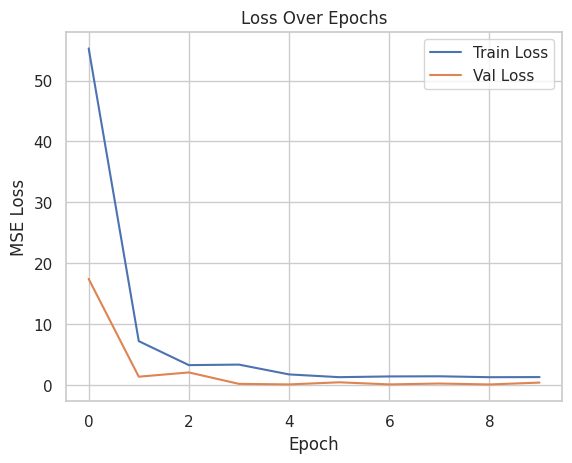

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate

# 👉 BƯỚC 1: ĐƯỜNG DẪN
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv"  # chứa các cột cảm xúc

# 👉 BƯỚC 2: ĐỌC LABEL
emotion_features = ['FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
                    'SadnessRating', 'SurpriseRating', 'ThreatRating',
                    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
                    'SadnessComp', 'SurpriseComp', 'ThreatComp']

cols_to_use = ['ImageFile', 'PainRating'] + emotion_features

df = pd.read_csv(CSV_PATH)
df = df[cols_to_use].dropna()

# 👉 BƯỚC 3: LOAD ẢNH & TÍCH HỢP FEATURES
X_img, X_meta, y = [], [], []

for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(root, file)
            if "_" in file:
                image_file_part = file.split("_")[-1]  # ví dụ EF5.jpg

                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0

                        meta_row = label_row[emotion_features].values[0]

                        X_img.append(img_array)
                        X_meta.append(meta_row)
                        y.append(label_row['PainRating'].values[0])
                    except Exception as e:
                        print(f"Lỗi xử lý ảnh {file}: {e}")

X_img = np.array(X_img)
X_meta = np.array(X_meta)
y = np.array(y)

print("Tổng ảnh hợp lệ:", len(X_img))

# 👉 BƯỚC 4: CHIA DỮ LIỆU
X_img_train, X_img_temp, X_meta_train, X_meta_temp, y_train, y_temp = train_test_split(
    X_img, X_meta, y, test_size=0.3, random_state=42)

X_img_val, X_img_test, X_meta_val, X_meta_test, y_val, y_test = train_test_split(
    X_img_temp, X_meta_temp, y_temp, test_size=0.5, random_state=42)

# 👉 BƯỚC 5: MÔ HÌNH MULTIMODAL
# Nhánh ảnh
img_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3,3), activation='relu')(img_input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)

# Nhánh cảm xúc (metadata)
meta_input = Input(shape=(len(emotion_features),))
m = Dense(32, activation='relu')(meta_input)

# Kết hợp 2 nhánh
combined = Concatenate()([x, m])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.3)(z)
output = Dense(1)(z)

model = Model(inputs=[img_input, meta_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 👉 BƯỚC 6: TRAIN
history = model.fit(
    [X_img_train, X_meta_train], y_train,
    validation_data=([X_img_val, X_meta_val], y_val),
    epochs=10,
    batch_size=16
)

# 👉 BƯỚC 7: ĐÁNH GIÁ
loss, mae = model.evaluate([X_img_test, X_meta_test], y_test)
print(f"\n🎯 Test MAE: {mae:.2f}")

# 👉 BƯỚC 8: VẼ LOSS
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Đường dẫn test
test_image_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/BM3/BM3_PMS5.jpg"
test_image_file = "EF5.jpg"  # So sánh với cột ImageFile

# 👉 Tìm hàng tương ứng trong DataFrame gốc
row = df[df["ImageFile"] == test_image_file]
if row.empty:
    print("❌ Không tìm thấy đặc trưng cảm xúc tương ứng.")
else:
    try:
        # Load ảnh
        img = load_img(test_image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Lấy đặc trưng cảm xúc từ đúng DataFrame
        meta = row[emotion_features].iloc[0].to_numpy(dtype=np.float32).reshape(1, -1)

        # Dự đoán
        prediction = model.predict([img_array, meta])[0][0]
        print(f"📷 Ảnh: {test_image_file} → 🎯 PainRating dự đoán: {prediction:.2f}")
    except Exception as e:
        print(f"❌ Lỗi khi dự đoán: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
📷 Ảnh: EF5.jpg → 🎯 PainRating dự đoán: 4.76


In [ ]:
import pandas as pd

# Đường dẫn đến tệp .xlsx
input_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx'  # Thay bằng đường dẫn tệp của bạn
output_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx'  # Tên tệp .csv đầu ra


# Đọc tệp .xlsx
df = pd.read_excel(input_file)

df = df.drop(columns=['ResponseId'])

df.head()

# Lưu dưới dạng .csv
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Đã chuyển đổi {input_file} sang {output_file}")


Đã chuyển đổi /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx sang /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Tùy chỉnh để hiển thị biểu đồ đẹp hơn
sns.set(style="whitegrid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **output.csv**

✅ Tổng ảnh hợp lệ: 128
✅ Train: 88 | Val: 16 | Test: 24
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - loss: 3.9891 - mae: 4.4891 - val_loss: 0.9464 - val_mae: 1.4458 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 933ms/step - loss: 1.0776 - mae: 1.5189 - val_loss: 0.3548 - val_mae: 0.8021 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 1.1961 - mae: 1.6303 - val_loss: 0.3352 - val_mae: 0.7741 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 680ms/step - loss: 0.7966 - mae: 1.2342 - val_loss: 1.1416 - val_mae: 1.6416 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 671ms/step - loss: 0.9198 - mae: 1.3555 - val_loss: 0.4100 - val_mae: 0.8704 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - loss: 0.5633 - mae: 0.9517 - val_loss: 0.0353 - val_mae: 0.2063 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 682ms/step - loss: 0.7526 - mae: 1.1790 - val_loss: 0.2039 - va

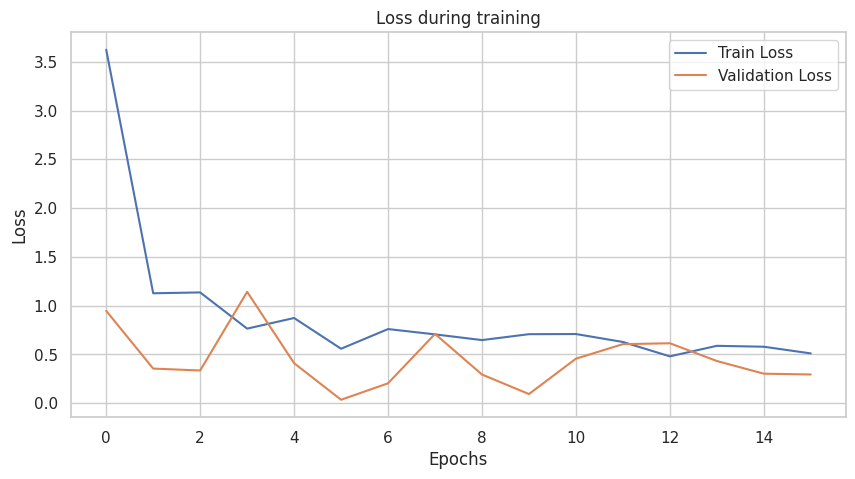

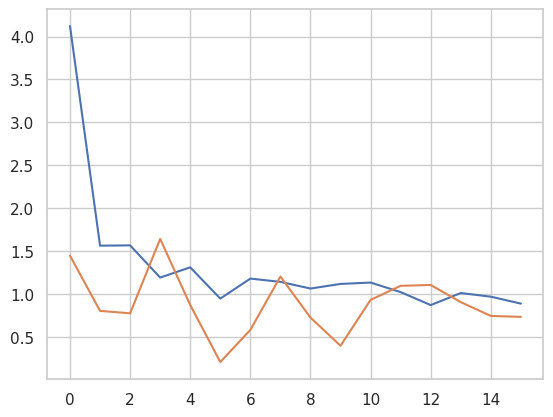

In [17]:
# 👉 IMPORT THƯ VIỆN
import os  # Thư viện dùng để tương tác với hệ điều hành, như duyệt file và thư mục (os.walk), tạo đường dẫn (os.path.join), lấy tên file/thư mục (os.path.basename, os.path.dirname)
import numpy as np  # Thư viện nền tảng cho tính toán khoa học, đặc biệt là với mảng đa chiều (arrays)
import pandas as pd  # Thư viện dùng để xử lý và phân tích dữ liệu, chủ yếu qua cấu trúc DataFrame
import matplotlib.pyplot as plt  # Thư viện dùng để vẽ đồ thị, biểu đồ
from sklearn.model_selection import train_test_split  # Hàm dùng để chia dữ liệu thành các tập train, validation, test

# Import các thành phần cần thiết từ TensorFlow/Keras để xây dựng và huấn luyện mô hình deep learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Hàm để tải ảnh từ file và chuyển thành dạng mảng numpy
from tensorflow.keras.models import Model  # Lớp cơ sở để tạo mô hình Keras (sử dụng Functional API ở đây)
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate  # Các loại layer: Input (đầu vào), Dense (fully connected), Dropout (chống overfitting), Concatenate (ghép nối các nhánh)
from tensorflow.keras.layers import BatchNormalization # Layer dùng để chuẩn hóa batch, giúp ổn định quá trình huấn luyện (dù không dùng trong model cuối)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks để điều khiển quá trình huấn luyện: dừng sớm khi không cải thiện, giảm learning rate khi loss không giảm
from tensorflow.keras.applications import EfficientNetB0  # Import kiến trúc mạng CNN EfficientNetB0 đã được huấn luyện trước (pre-trained)
from tensorflow.keras.applications.efficientnet import preprocess_input  # Hàm tiền xử lý ảnh theo yêu cầu của EfficientNet
from tensorflow.keras.losses import Huber # Import hàm Huber loss, một hàm loss mạnh mẽ cho hồi quy, ít nhạy cảm với outlier hơn MSE

# 👉 BƯỚC 1: ĐƯỜNG DẪN
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller" # Đường dẫn tới thư mục chứa ảnh khuôn mặt
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv" # Đường dẫn tới file CSV chứa thông tin (ratings, features)

# 👉 BƯỚC 2: ĐỌC CSV & CHUẨN HÓA
df = pd.read_csv(CSV_PATH) # Đọc dữ liệu từ file CSV vào một Pandas DataFrame tên là 'df'
df.columns = df.columns.str.strip() # Loại bỏ khoảng trắng thừa ở đầu và cuối tên các cột
df.columns = df.columns.str.replace(",", ".", regex=False) # Thay thế dấu phẩy "," bằng dấu chấm "." trong tên cột (nếu có, thường do lỗi định dạng)

# Định nghĩa danh sách các cột chứa thông tin đánh giá cảm xúc (emotion ratings/components)
emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

# Định nghĩa danh sách các cột chứa thông tin đặc trưng khuôn mặt (facial action units / blendshapes)
face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]

# Lọc danh sách face_features, chỉ giữ lại những cột thực sự tồn tại trong DataFrame df
# Điều này giúp tránh lỗi nếu một số cột trong danh sách không có trong file CSV thực tế
face_features = [col for col in face_features if col in df.columns]

# Loại bỏ các hàng (samples) có giá trị thiếu (NaN) trong các cột quan trọng:
# 'ImageFile' (tên file ảnh), 'PainRating' (nhãn dự đoán), và tất cả các cột emotion/face features đã định nghĩa.
# Đảm bảo dữ liệu dùng để huấn luyện là hoàn chỉnh.
df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# 👉 BƯỚC 3: LOAD DỮ LIỆU
# Khởi tạo các list rỗng để lưu trữ dữ liệu đã xử lý
X_img = []  # List chứa các mảng numpy của ảnh
X_emotion = [] # List chứa các mảng numpy của emotion features
X_face = [] # List chứa các mảng numpy của face features
y = [] # List chứa các giá trị nhãn (PainRating)
img_folder_names = [] # List chứa tên thư mục chứa của mỗi ảnh (dùng để chia train/val/test theo thư mục)

# Duyệt qua tất cả các file và thư mục con trong thư mục IMAGE_DIR
for root, dirs, files in os.walk(IMAGE_DIR):
    # Duyệt qua từng file trong danh sách files của thư mục hiện tại
    for file in files:
        # Chỉ xử lý các file có đuôi là .jpg hoặc .png
        if file.endswith('.jpg') or file.endswith('.png'):
            # Tạo đường dẫn đầy đủ đến file ảnh
            img_path = os.path.join(root, file)
            # Lấy tên file ảnh
            img_name = file

            # Kiểm tra xem tên file có chứa dấu "_" hay không (giả định cấu trúc tên file cần tách)
            if "_" in img_name:
                # Tách tên file bằng dấu "_", lấy phần cuối cùng làm định danh để khớp với cột 'ImageFile' trong CSV
                # Ví dụ: 'Subject1_Image123.jpg' -> 'Image123.jpg'
                image_file_part = img_name.split("_")[-1]

                # Tìm hàng trong DataFrame 'df' có cột 'ImageFile' khớp với phần tên file vừa tách
                label_row = df[df['ImageFile'] == image_file_part]

                # Kiểm tra xem có tìm thấy hàng nào khớp không
                if not label_row.empty:
                    # Sử dụng khối try-except để bỏ qua các file ảnh bị lỗi khi đọc hoặc xử lý
                    try:
                        # Tải ảnh từ đường dẫn, thay đổi kích thước thành 128x128 pixels
                        img = load_img(img_path, target_size=(128, 128))
                        # Chuyển ảnh thành mảng numpy và chuẩn hóa giá trị pixel về khoảng [0, 1] bằng cách chia cho 255.0
                        img_array = img_to_array(img) / 255.0

                        # Lấy dữ liệu emotion features từ hàng đã tìm được trong DataFrame
                        # .values[0] để lấy mảng numpy từ hàng đầu tiên (và duy nhất) khớp
                        emotion_data = label_row[emotion_features].values[0]
                        # Lấy dữ liệu face features tương tự
                        face_data = label_row[face_features].values[0]
                        # Lấy giá trị PainRating (nhãn) tương tự
                        pain = label_row['PainRating'].values[0]

                        # Thêm dữ liệu đã xử lý vào các list tương ứng
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)

                        # Lấy tên của thư mục cha chứa file ảnh hiện tại
                        # Ví dụ: '/path/to/Subject1/Image123.jpg' -> 'Subject1'
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        # Thêm tên thư mục vào list để phục vụ việc chia dữ liệu sau này
                        img_folder_names.append(folder_name)

                    # Nếu có lỗi xảy ra (ví dụ: file ảnh bị hỏng), in thông báo lỗi và tiếp tục vòng lặp
                    except Exception as e:
                        print(f"❌ Lỗi xử lý ảnh {file}: {e}")

# Chuyển các list chứa dữ liệu thành các mảng NumPy để có thể đưa vào mô hình Keras
X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names) # Chuyển list tên thư mục thành mảng NumPy

# In ra tổng số lượng ảnh đã được xử lý và thêm vào dữ liệu thành công
print("✅ Tổng ảnh hợp lệ:", len(X_img))

# 👉 BƯỚC 4: CHIA DỮ LIỆU (THEO THƯ MỤC)
# Lấy danh sách duy nhất các tên thư mục từ mảng img_folder_names và sắp xếp lại
all_folders = sorted(list(set(img_folder_names)))
# Chia danh sách các *tên thư mục* thành 3 phần: train (70%), validation (15%), test (15%)
# Cách chia này đảm bảo tất cả ảnh từ cùng một thư mục (ví dụ, cùng một người) sẽ nằm hoàn toàn trong một tập (train, val, hoặc test)
# Tránh rò rỉ dữ liệu giữa các tập.
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42) # Chia 70% train, 30% tạm
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42) # Chia 30% tạm thành 15% val, 15% test

# Định nghĩa hàm trợ giúp để chia các mảng dữ liệu (X_img, X_emotion, ...) dựa trên danh sách thư mục đã chia
def split_by_folder(folders, img_folders, *arrays):
    # Tạo list rỗng cho mỗi mảng dữ liệu đầu vào (*arrays)
    results = [[] for _ in range(len(arrays))]
    # Duyệt qua từng mẫu dữ liệu (tương ứng với từng ảnh)
    for i, folder_name in enumerate(img_folders):
        # Nếu tên thư mục của ảnh này nằm trong danh sách thư mục đích (ví dụ: train_folders)
        if folder_name in folders:
            # Lấy dữ liệu tương ứng từ mỗi mảng trong *arrays và thêm vào list kết quả tương ứng
            for res, arr in zip(results, arrays):
                res.append(arr[i])
    # Chuyển các list kết quả thành mảng NumPy và trả về
    return map(np.array, results)

# Sử dụng hàm split_by_folder để tạo các tập dữ liệu train, validation, test thực sự
# Dựa trên các danh sách thư mục đã chia (train_folders, val_folders, test_folders)
X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)

# In ra kích thước của các tập dữ liệu sau khi chia
print("✅ Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# 👉 BƯỚC 5: XÂY DỰNG MÔ HÌNH (MULTI-INPUT)
# --- Nhánh xử lý ảnh ---
# Định nghĩa lớp Input cho dữ liệu ảnh với kích thước (128, 128, 3)
img_input = Input(shape=(128, 128, 3), name='ImageInput')
# Áp dụng hàm tiền xử lý của EfficientNet cho đầu vào ảnh
x = preprocess_input(img_input)
# Tải mô hình EfficientNetB0 đã được huấn luyện trước trên ImageNet
# include_top=False: Bỏ lớp phân loại cuối cùng của EfficientNet
# input_tensor=x: Sử dụng tensor đã tiền xử lý làm đầu vào cho EfficientNet
# pooling='avg': Áp dụng Global Average Pooling vào lớp cuối cùng của EfficientNet để có vector đặc trưng cố định kích thước
# weights='imagenet': Sử dụng trọng số đã huấn luyện trên ImageNet
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
# Đóng băng các trọng số của EfficientNet -> không cập nhật trọng số này trong quá trình huấn luyện ban đầu
base_model.trainable = False

# Lấy đầu ra (vector đặc trưng) từ EfficientNet
x = base_model.output
# Thêm một lớp Dense (fully connected) với 256 đơn vị và hàm kích hoạt ReLU
x = Dense(256, activation='relu')(x)
# Thêm lớp Dropout với tỷ lệ 0.5 để giảm overfitting cho nhánh ảnh
x = Dropout(0.5)(x)
# Kết thúc nhánh xử lý ảnh, biến 'x' chứa đặc trưng được trích xuất và xử lý từ ảnh

# --- Nhánh xử lý Emotion Features ---
# Định nghĩa lớp Input cho dữ liệu emotion features, kích thước bằng số lượng feature trong list emotion_features
emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
# Thêm lớp Dense với 128 đơn vị và hàm kích hoạt ReLU
e = Dense(128, activation='relu')(emotion_input)
# Thêm lớp Dropout với tỷ lệ 0.3
e = Dropout(0.3)(e)
# Thêm lớp Dense với 64 đơn vị và hàm kích hoạt ReLU
e = Dense(64, activation='relu')(e)
# Kết thúc nhánh xử lý emotion, biến 'e' chứa đặc trưng được xử lý từ emotion features

# --- Nhánh xử lý Face Features ---
# Định nghĩa lớp Input cho dữ liệu face features, kích thước bằng số lượng feature trong list face_features
face_input = Input(shape=(len(face_features),), name='FaceInput')
# Thêm lớp Dense với 128 đơn vị và hàm kích hoạt ReLU
f = Dense(128, activation='relu')(face_input)
# Thêm lớp Dropout với tỷ lệ 0.3
f = Dropout(0.3)(f)
# Thêm lớp Dense với 64 đơn vị và hàm kích hoạt ReLU
f = Dense(64, activation='relu')(f)
# Kết thúc nhánh xử lý face, biến 'f' chứa đặc trưng được xử lý từ face features

# --- Kết hợp các nhánh ---
# Sử dụng lớp Concatenate để ghép nối các tensor đầu ra từ 3 nhánh (ảnh, emotion, face) thành một tensor duy nhất
combined = Concatenate()([x, e, f])
# Thêm một lớp Dense với 128 đơn vị và hàm kích hoạt ReLU sau khi kết hợp
z = Dense(128, activation='relu')(combined)
# Thêm lớp Dropout với tỷ lệ 0.4
z = Dropout(0.4)(z)
# Thêm một lớp Dense với 64 đơn vị và hàm kích hoạt ReLU
z = Dense(64, activation='relu')(z)
# Thêm lớp Dropout với tỷ lệ 0.2
z = Dropout(0.2)(z)
# Lớp Dense cuối cùng với 1 đơn vị (output) và không có hàm kích hoạt (hoặc hàm tuyến tính - linear)
# để dự đoán giá trị liên tục (PainRating)
output = Dense(1, name='PainOutput')(z)

# Tạo đối tượng Model bằng cách chỉ định các đầu vào (inputs) và đầu ra (outputs)
model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)

# Biên dịch mô hình (compile)
# optimizer='adam': Sử dụng thuật toán tối ưu Adam
# loss=Huber(delta=1.0): Sử dụng Huber loss với delta=1.0 để cân bằng giữa MSE và MAE
# metrics=['mae']: Đo lường chất lượng dự đoán bằng chỉ số Mean Absolute Error
model.compile(
    optimizer='adam',
    loss=Huber(delta=1.0),
    metrics=['mae']
)

# 👉 BƯỚC 6: TRAIN MÔ HÌNH
# Khởi tạo các callback để hỗ trợ quá trình huấn luyện:
callbacks = [
    EarlyStopping(
        monitor='val_loss',    # Theo dõi giá trị validation loss
        patience=10,           # Nếu 10 epoch liên tiếp không giảm -> dừng sớm
        restore_best_weights=True  # Phục hồi lại trọng số tốt nhất
    ),
    ReduceLROnPlateau(
        monitor='val_loss',    # Theo dõi giá trị validation loss
        factor=0.5,            # Nếu loss không giảm, giảm learning rate đi 1/2
        patience=5,            # Sau 5 epoch không cải thiện thì giảm
        verbose=1              # In ra thông báo khi learning rate thay đổi
    )
]

# Bắt đầu huấn luyện mô hình
history = model.fit(
    [X_img_train, X_emo_train, X_face_train],  # Các đầu vào
    y_train,                                   # Nhãn (PainRating)
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val), # Dữ liệu validation
    epochs=100,                                # Số lượng epoch tối đa
    batch_size=32,                             # Kích thước batch
    callbacks=callbacks,                       # Các callback hỗ trợ huấn luyện
    verbose=1                                  # In log huấn luyện ra màn hình
)

# BƯỚC 7: ĐÁNH GIÁ MÔ HÌNH
# Đánh giá mô hình trên tập test
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)

print(f"✅ Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# BƯỚC 8: VẼ BIỂU ĐỒ LOSS/MAE
# Vẽ đồ thị loss theo epoch
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Nếu cần vẽ thêm MAE, bạn cũng có thể thêm:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


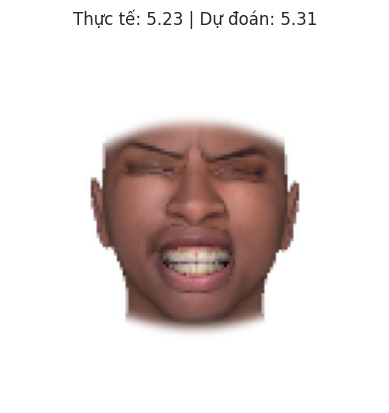

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


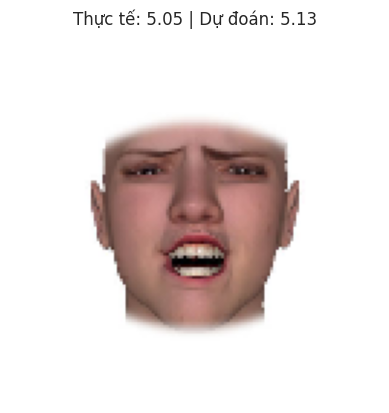

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


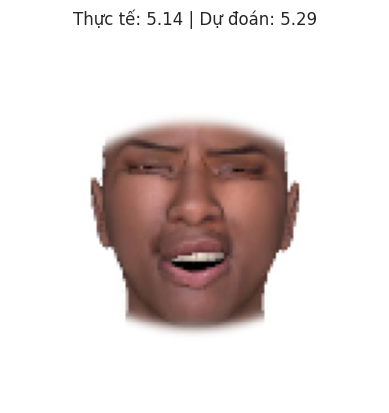

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


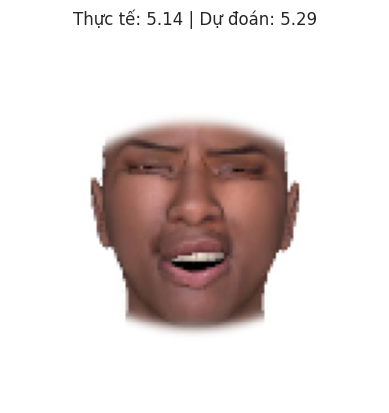

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


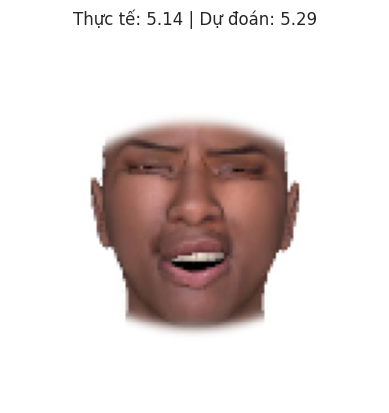

In [18]:
import random

for _ in range(5):  # test 5 mẫu random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Thực tế: {y_test[idx]:.2f} | Dự đoán: {pred:.2f}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


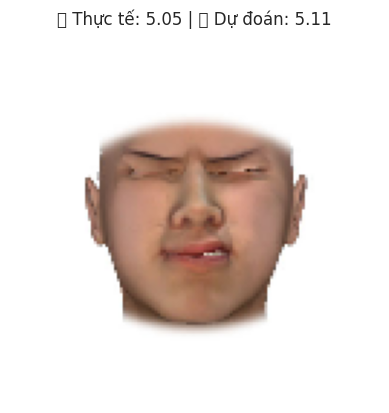

In [5]:
# 👉 Đường dẫn ảnh test mới
img_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/AF1/AF1_PMS7.jpg"
image_file_part = "EF5.jpg"  # Phần tên file khớp trong cột 'ImageFile' của CSV

# 👉 Tìm dòng tương ứng trong DataFrame
row = df[df['ImageFile'] == image_file_part]
if row.empty:
    print("❌ Không tìm thấy thông tin tương ứng trong file CSV.")
else:
    # 👉 Tiền xử lý ảnh
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 👉 Trích xuất đặc trưng cảm xúc và khuôn mặt
    emotion_input_sample = np.expand_dims(row[emotion_features].values[0], axis=0)
    face_input_sample = np.expand_dims(row[face_features].values[0], axis=0)

    # 👉 Dự đoán
    predicted_pain = model.predict([img_array, emotion_input_sample, face_input_sample])[0][0]

    # 👉 Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"🎯 Thực tế: {y_test[idx]:.2f} | 🤖 Dự đoán: {pred:.2f}")
    plt.show()

